# SGLD demo
**use SGLD to draw samples from a Gaussian mixture**    
**to see whether SGLD can find two modes**

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def gaussian(x, mean, var):
    inner = -0.5 * (x - mean)**2./var
    return tf.math.exp(inner)/(tf.math.sqrt(2. * np.pi * var))

def gaussian_mixture(x, mean_1, var_1, mean_2, var_2):
    return 0.5*gaussian(x, mean_1, var_1) + 0.5*gaussian(x, mean_2, var_2)

def log_p(x, mean_1, var_1, mean_2, var_2):
    return tf.math.log(gaussian_mixture(x, mean_1, var_1, mean_2, var_2))

In [3]:
mean_1, var_1 = -2., 2.
mean_2, var_2 = 2., 0.2

n_epoches = 50000
lr_0 = 0.1

x = tf.Variable(5.)

samples = [x.numpy()]
for epoch in range(n_epoches):
    lr = lr_0 *(1+epoch)**(-0.55)
    with tf.GradientTape() as tape:
        U = log_p(x, mean_1, var_1, mean_2, var_2)
    grad = tape.gradient(U, x)
    tmp = lr * grad
    eps = tf.random.normal(tf.shape(x))
    tmp += tf.math.sqrt(2.* lr) * eps
    x.assign_add(tmp)
    samples.append(x.numpy())  

Metal device set to: Apple M1 Pro


2022-06-11 00:08:29.980921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-11 00:08:29.981067: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(array([3.700e+01, 1.940e+02, 3.130e+02, 1.410e+02, 5.310e+02, 6.050e+02,
        6.460e+02, 8.750e+02, 7.400e+02, 4.570e+02, 2.220e+02, 4.280e+02,
        7.060e+02, 1.033e+03, 1.032e+03, 7.630e+02, 6.040e+02, 7.890e+02,
        1.063e+03, 1.503e+03, 1.618e+03, 1.763e+03, 1.662e+03, 1.518e+03,
        2.026e+03, 2.134e+03, 1.219e+03, 1.636e+03, 1.897e+03, 1.550e+03,
        1.544e+03, 1.244e+03, 8.500e+02, 5.880e+02, 2.470e+02, 1.380e+02,
        1.220e+02, 2.360e+02, 7.830e+02, 7.100e+02, 1.243e+03, 1.946e+03,
        2.251e+03, 2.418e+03, 2.657e+03, 1.638e+03, 8.680e+02, 3.610e+02,
        1.930e+02, 1.120e+02, 4.700e+01, 4.600e+01, 3.900e+01, 1.200e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-6.0773287 , -5.8927064 , -5.7080846 , -5.5234623 , -5.33884   ,
        -5.1542177 , -4.969596  , -4.7849736 , -4.6003513 , -4.4157295 ,
        -4.231107  , -4.046485  , -3.861863  , -3.6772408 , -3.4926186 ,
        -3.3079965 , -3.1233745 , -2.93

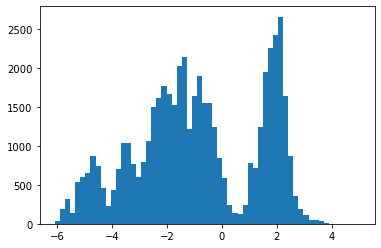

In [4]:
plt.hist(samples, bins=60)

In [11]:
samples[2500:5000]

[-1.5904034,
 -1.5586089,
 -1.5197437,
 -1.4418375,
 -1.3982642,
 -1.3630881,
 -1.4325242,
 -1.3634337,
 -1.3331803,
 -1.3383867,
 -1.2447895,
 -1.1865814,
 -1.1507248,
 -1.1515495,
 -1.1148415,
 -1.0500381,
 -1.1142309,
 -1.1443454,
 -1.1099747,
 -1.1031258,
 -1.1500841,
 -1.1802641,
 -1.1418194,
 -1.1642932,
 -1.1560116,
 -1.1200715,
 -1.1205931,
 -1.1341494,
 -1.1127237,
 -1.1755517,
 -1.2329371,
 -1.1529489,
 -1.0346051,
 -0.945045,
 -0.9125386,
 -0.96181345,
 -0.9485943,
 -0.97543585,
 -0.951787,
 -0.87924385,
 -0.9058854,
 -0.92621785,
 -0.906394,
 -0.9312677,
 -0.9309592,
 -0.93399507,
 -0.816296,
 -0.7968343,
 -0.78499705,
 -0.74893975,
 -0.77020556,
 -0.7230592,
 -0.7371817,
 -0.670175,
 -0.67483747,
 -0.6371957,
 -0.70765376,
 -0.7257652,
 -0.6806318,
 -0.73205507,
 -0.70658004,
 -0.6185358,
 -0.6170356,
 -0.75629383,
 -0.78042704,
 -0.8045563,
 -0.86161894,
 -0.87164474,
 -0.91383547,
 -0.89105415,
 -0.8824691,
 -0.9043681,
 -0.9667282,
 -1.0087574,
 -1.0424869,
 -0.9292204,

(array([0.01036808, 0.06665196, 0.09479406, 0.05332157, 0.12145468,
        0.17033278, 0.18810664, 0.07850133, 0.10960544, 0.09035043,
        0.0947939 , 0.08146358, 0.05924618, 0.09479398, 0.24290936,
        0.26216448, 0.30067452, 0.50507372, 0.47693199, 0.43249734,
        0.49026239, 0.41916685, 0.36288304, 0.28586293, 0.11849241,
        0.03554773, 0.0133304 , 0.00296231, 0.00888693, 0.02221733,
        0.03851002, 0.0503593 , 0.04739695, 0.0503593 , 0.07109542,
        0.08294466, 0.14663444, 0.23402263, 0.2740136 , 0.19551241,
        0.1925501 , 0.11997352, 0.11849258, 0.05035926, 0.09183159,
        0.0977562 , 0.07702004, 0.03554777, 0.05332157, 0.05628388,
        0.01925501, 0.00444346, 0.        , 0.        , 0.00148115,
        0.00148116, 0.        , 0.        , 0.        , 0.00148115]),
 array([-3.1017847e+00, -2.9667549e+00, -2.8317251e+00, -2.6966956e+00,
        -2.5616658e+00, -2.4266360e+00, -2.2916062e+00, -2.1565764e+00,
        -2.0215468e+00, -1.8865170e+00

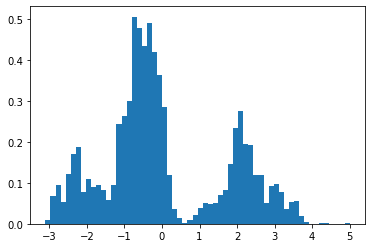

In [9]:
plt.hist(samples[0:5000], bins=60, density=True)